In [1]:
import numpy as np

Problem-1: A network consists of $n$ stations, labeled $1,\ldots,n.$ A path through the network is a subset of the stations. This data can be represented as an $N\times n$-matrix $P$, where $$P_{ij} =\begin{cases}1,& \text{if station } j \text{ is on path } i,\\0,&\text{otherwise}.\end{cases}$$ The code snippet below simulates the matrix $P$ for $10$ stations and $100$ paths.

In [7]:
# Simulating a network tomography matrix
np.random.seed(1)
npaths = 100
nstations = 10
P = np.random.choice(np.arange(0,2), (npaths, nstations))

**Problem-1.1**: Busy paths have *at least* 7 stations in them? What are the busy paths and how many of them do we have?

In [9]:
result = np.where(np.dot(P, np.ones(nstations)) >= 7)
print(result[0])
print(result[0].shape[0])


[ 0  4 12 23 24 31 33 44 50 56 61 71 79 80 89 96 97]
17


**Problem-1.2**: Busy stations show up in *at least* 50 paths? What are the busy stations and how many of them do we have?

In [8]:
result = np.where(np.dot(P, np.ones(nstations)) >= 50)
print(result[0])
print(result[0].shape[0])

[]
0


**Problem-1.3**: Station-1 is *most similar* to which other station?

In [11]:
result = np.linalg.norm(P.T[0] - P.T[1:], axis = 1)
print(result)
np.where(result == 0)

[6.55743852 7.07106781 6.8556546  7.         7.07106781 7.48331477
 7.07106781 6.70820393 6.92820323]


(array([], dtype=int64),)

**Problem-1.4**: Express the number of paths common to each pair of stations as a product of two matrices. How many paths are common to station-4 and station-10?

In [13]:
result = np.dot(P, P.T)
print(result[3, 9])

4


**Problem-1.5**: Express the number of stations common to each pair of paths as a product of two matrices. How many stations are common to the 1st path and the 100th path? How many stations do we have in the 100th path?

In [20]:
result = np.dot(P, P.T)
# Stations common to the 1st path and the 100th path
print(result[0, 99])
# Number of stations in the 100th path
print(result[np.sum(P[99])])

1
[3 2 3 1 3 3 2 2 1 1 2 2 2 1 1 2 1 3 0 1 2 2 2 1 2 2 1 1 2 0 1 2 1 2 0 1 1
 2 3 1 1 1 3 2 2 0 1 0 1 1 2 1 1 2 1 2 3 0 2 2 0 3 1 1 0 0 2 2 0 1 1 3 2 0
 2 2 1 1 1 1 2 2 1 1 1 1 1 2 1 2 2 2 0 0 1 2 3 3 1 1]


**Problem-2**: A *compartmental system* is a model used to describe the movement of some material over time among a set of $n$ compartments of a system and the outside world. It is widely used in pharmaco-kinetics, the study of how the concentration of a drug varies over time in the body. In this application, the material is a drug, and the compartments are the bloodstream, lungs, heart, liver, kidneys, and so on. Compartmental systems are special cases of linear dynamical systems. In this problem we will consider a very simple compartmental system with $3$ compartments. We let $(x_t)_i$ denote the amount of the material (say, a drug) in compartment $i$ at time stamp $t.$ Between time stamps $t$ and $t+1,$ the material moves as follows:

* 20% of the material in compartment 1 moves to compartment 2. (This decreases
the amount in compartment 1 and increases the amount in compartment 2.)
* 5% of the material in compartment 2 moves to compartment 1.
* 5% of the material in compartment 2 moves to compartment 3.
* 10% of the material in compartment 2 is eliminated.
* 5% of the material in compartment 3 moves to compartment 1
* 5% of the material in compartment 3 moves to compartment 2.

This compartmental system can be modeled as a linear dynamical system, $x_{t+1} = Ax_t,$ where $A$ is the linear dynamics matrix.

**Problem-2.1**: Construct the linear dynamics matrix $A.$

In [21]:
# Linear dynamical system matrix
A = np.array([[1 - 0.20, 0.05, 0.05],
    [0.20, 1 - 0.05 - 0.10, 0.05],
    [0.05, 0.10, 1 - 0.05 - 0.05]])

**Problem-2.2**: Suppose that the initial concentration of the three drugs is 20%, 10%, and 70%, respectively. We want to simulate the linear dynamical system for 200 time stamps.

In [23]:
# Time period
T = 200

# Initialize the three drug concentration values to zeros for all time stamps
X = np.zeros((3, T+1))

# Initial state vector
X[:, 0] = np.array([0.20, 0.10, 0.70])

# Simulate the linear dynamical system for all time stamps
for j in np.arange(0, T):
    X[:, j+1] = np.dot(A, X[:, j])

X[:, 1:]

array([[0.2       , 0.2005    , 0.201375  , 0.2025325 , 0.20390406,
        0.20543907, 0.20710008, 0.20885944, 0.2106967 , 0.2125968 ,
        0.21454862, 0.21654397, 0.21857686, 0.22064289, 0.22273885,
        0.22486243, 0.22701196, 0.22918626, 0.23138452, 0.23360618,
        0.23585088, 0.23811843, 0.24040871, 0.24272172, 0.2450575 ,
        0.24741614, 0.24979777, 0.25220252, 0.25463059, 0.25708214,
        0.25955738, 0.26205652, 0.26457976, 0.26712734, 0.26969947,
        0.27229639, 0.27491832, 0.27756551, 0.28023821, 0.28293664,
        0.28566106, 0.28841171, 0.29118886, 0.29399275, 0.29682363,
        0.29968178, 0.30256745, 0.30548091, 0.30842242, 0.31139226,
        0.31439069, 0.31741799, 0.32047445, 0.32356034, 0.32667594,
        0.32982154, 0.33299743, 0.3362039 , 0.33944125, 0.34270977,
        0.34600976, 0.34934153, 0.35270539, 0.35610163, 0.35953057,
        0.36299254, 0.36648783, 0.37001679, 0.37357973, 0.37717697,
        0.38080885, 0.38447571, 0.38817787, 0.39

**Problem-2.3**: Plot the concentrations of the three drugs for all time stamps. Which drug component shows an initial increase and then a decrease in its concentration? Approximately, at what time stamp does that drug concentration peak? Which drug component shows the least rapid change in the initial time stamps?

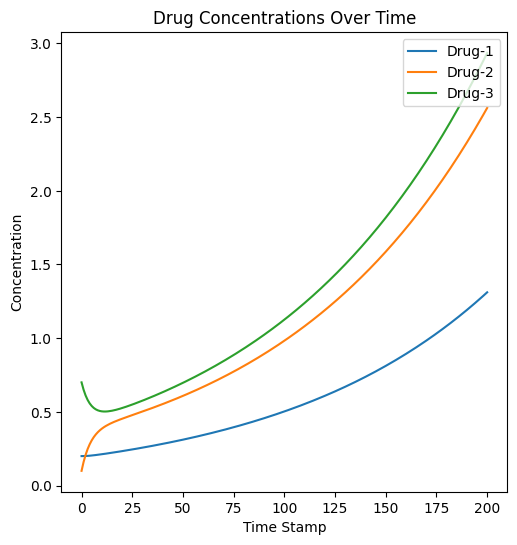

In [29]:
import matplotlib.pyplot as plt
# Create a time array from 0 to 200
time_stamps = np.arange(0, T+1)

fig, ax = plt.subplots(1, 1, figsize = (6,6))
fig.tight_layout(pad = 4.0)
ax.plot(time_stamps, X[0], label="Drug-1")
ax.plot(time_stamps, X[1], label="Drug-2")
ax.plot(time_stamps, X[2], label="Drug-3")
plt.legend(["Drug-1", "Drug-2", "Drug-3"], loc ="upper right")
plt.xlabel("Time Stamp")
plt.ylabel("Concentration")
plt.title("Drug Concentrations Over Time")

# Show the plot
plt.show()